# Исследование надёжности заёмщиков

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель исследования</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Знакомство с данными</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Стандартизация-формулировок-целей" data-toc-modified-id="Стандартизация-формулировок-целей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Стандартизация формулировок целей</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Категоризация данных</a></span><ul class="toc-item"><li><span><a href="#Категоризация-целей-кредита" data-toc-modified-id="Категоризация-целей-кредита-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Категоризация целей кредита</a></span></li><li><span><a href="#Категоризация-доходов" data-toc-modified-id="Категоризация-доходов-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Категоризация доходов</a></span></li><li><span><a href="#Категоризация-количества-детей" data-toc-modified-id="Категоризация-количества-детей-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Категоризация количества детей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Влияние-характеристик-клиентов-на-возврат-кредита-в-срок" data-toc-modified-id="Влияние-характеристик-клиентов-на-возврат-кредита-в-срок-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Влияние характеристик клиентов на возврат кредита в срок</a></span><ul class="toc-item"><li><span><a href="#Количество-детей" data-toc-modified-id="Количество-детей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Количество детей</a></span></li><li><span><a href="#Семейное-положение" data-toc-modified-id="Семейное-положение-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Семейное положение</a></span></li><li><span><a href="#Уровень-дохода" data-toc-modified-id="Уровень-дохода-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уровень дохода</a></span></li><li><span><a href="#Цели-кредита" data-toc-modified-id="Цели-кредита-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Цели кредита</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Цель исследования

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли на факт погашения кредита в срок:

- семейное положение
- количество детей клиента
- уровень дохода
- цель кредита

Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Обзор данных

Банк предоставил нам данные в виде файла 'data.csv', содержащего статистику платежеспособности клиентов. Откроем файл, изучим общую информацию о нем.

### Загрузка библиотек

In [1]:
import pandas as pd

from pymystem3 import Mystem
m = Mystem()
from collections import Counter

import matplotlib.pyplot as plt

# настроим отображение больших чисел без плавающей точки
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Знакомство с данными

In [2]:
data = pd.read_csv('data_bank_project.csv')
    
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.67,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,-4024.80,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,-5623.42,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,-4124.75,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,340266.07,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу


**Вывод**

Для анализа имеем таблицу, содержащую 21 525 кредитных историй (строк). Для каждой кредитной истории доступны 12 характеристик (столбцов):

    - children — количество детей в семье 
    - days_employed — общий трудовой стаж в днях 
    - dob_years — возраст клиента в годах 
    - education — уровень образования клиента 
    - education_id — идентификатор уровня образования  
    - family_status — семейное положение 
    - family_status_id — идентификатор семейного положения 
    - gender — пол клиента 
    - income_type — тип занятости 
    - debt — имел ли задолженность по возврату кредитов
    - total_income — ежемесячный доход
    - purpose — цель получения кредита

В столбцах 'days_employed' и 'total_income' есть пропущенные значения.

Для ответа на поставленные вопросы нам потребуются, данные из столбцов 'children', 'family_status' / 'family_status_id', 'debt', 'total_income', 'purpose'.

## Предобработка данных

### Обработка пропусков

На предыдущем шаге мы увидели, что пропуски имеются в 2х столбцах датасета. Подсчитаем их количество.

In [3]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [4]:
data.isna().mean()

children           0.00
days_employed      0.10
dob_years          0.00
education          0.00
education_id       0.00
family_status      0.00
family_status_id   0.00
gender             0.00
income_type        0.00
debt               0.00
total_income       0.10
purpose            0.00
dtype: float64

В столбцах 'days_employed' и 'total_income' одинаковое количество пропусков - по 2174 значения или 10% от всех значений столбца. Проверим, может быть, это одни и те же строки?

In [5]:
data[(data['days_employed'].isna() == 1) & (data['total_income'].isna() == 1)].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

Так и есть: в строках с пропущенным стажем, пропущен и доход. Столбец со стажем не нужен нам для ответа на поставленные вопросы, а также он нам не поможет заполнить пропуски в столбце с доходом (т.к. в нем самом пропуски). Поэтому удалим этот столбец.

In [6]:
data = data.drop(columns='days_employed')
data.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу


Теперь заполним пропуски в столбце 'total_income'. Учитывая, что у одних и тех же заемщиков пропущены сразу 2 поля - доход и стаж, это похоже на технический сбой либо при внесении данных либо при выгрузке.

Для заполнения столбца 'total_income' можно было бы просто взять медиану всего столбца. Однако в разных социальных группах доходы могут значительно отличаться. Поэтому логично было бы сгруппировать доходы по наиболее важному признаку и посчитать медиану для каждой группы. Предлагаю брать именно медиану, а не среднее арифметическое, т.к. в каждой группе могут быть артефакты (сверхвысокие или сверхнизкие доходы, нетипичные для группы).

На доход теоретически могут влиять все имеющиеся характеристики. Но все же наиболее очевидна зависимость от типа занятости.  Поэтому сгруппируем заемщиков по типу занятости и внутри каждой группы заменим пропуски на медиану для этой группы.

Для начала посмотрим какие источники дохода, встречаются в столбце с типом занятости:

In [7]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Чуть более половины заемщиков (52%) - это сотрудники, т.е. наемные работники; 24% - компаньоны (скорее всего, это собственники бизнеса); 18% - пенсионеры; 7% - госслужащие. И менее 1% приходится суммарно на предпринимателей, безработных, родителей в декрете и студентов.

Теперь проверим, в каких группах встречаются пропуски данных:

In [8]:
data['income_type'][data['total_income'].isna() == 1].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Пропуски встречаются во всех популярных типах занятости, а также среди предпринимателей. Всего у нас предпринимателей 2 и у одного из них не указан доход. Заполнять доход одного предпринимателя тем же значением, что и у второго будет некорректно, т.к. разброс доходов в предпринимательской среде может быть очень велик. Придется удалить из анализа предпринимателя с отсутствующими данными по размеру дохода (т.к. доход по условию задачи является важным признаком для анализа).

In [9]:
data[(data['total_income'].isna() == 1) & (data['income_type'] == 'предприниматель')]

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости


In [10]:
data = data.drop(index=[5936])
data['income_type'][data['total_income'].isna() == 1].value_counts()

сотрудник      1105
компаньон       508
пенсионер       413
госслужащий     147
Name: income_type, dtype: int64

Заполним пропуски соответствующими медианами и проверим, что пропусков в таблице не осталось

In [11]:
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))
data.isna().sum()

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

Пропуски найдены в столбцах со стажем и доходом (по 10% от количества наблюдений). Наиболее вреоятная причина появления пропусков - технический сбой при внесении либо при выгрузке данных, т.к. пропуски наблюдаются одновременно в столбцах 'days_employed' и 'total_income' у одних и тех же заемщиков. 

Столбец со стажем удалили, т.к. он не влияет на решение поставленной задачи и при этом является "проблемным" - содержит отрицательные и нереалистичные значения. В столбце с доходом мы заполнили пропуски медианными значениями для каждого типа занятости. 

### Замена типа данных

Посмотрим еще раз на типы данных в нашем датасете и приведем их к более удобному формату.

In [12]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   dob_years         21524 non-null  int64  
 2   education         21524 non-null  object 
 3   education_id      21524 non-null  int64  
 4   family_status     21524 non-null  object 
 5   family_status_id  21524 non-null  int64  
 6   gender            21524 non-null  object 
 7   income_type       21524 non-null  object 
 8   debt              21524 non-null  int64  
 9   total_income      21524 non-null  float64
 10  purpose           21524 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу


Заменим вещественные значения в столбце 'total_income' на целочисленные:

In [13]:
data['total_income'] = data['total_income'].astype('int64')
data['total_income'].dtype

dtype('int64')

**Вывод**

В столбце с доходом дробные части нам не нужны, кроме того, они затрудняют восприятие показателей, поэтому мы заменили в них тип данных с веществанного на целочисленный.

### Обработка дубликатов

При беглом взгляде на первые строки таблицы видно, что в столбце 'education' присутствуют одинаковые значения с разным регистром. Неявные дубликаты могут присутствовать и в других текстовых столбцах. Поэтому сначала избавимся от неявных, а затем удалим явные дубликаты (т.к. количество последних может увеличиться).

Начнем со **столбца с уровнем образования**. Приведем строки к нижнему регистру и найдем все уникальные значения столбца:

In [14]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15233
высшее                  5259
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Проверим **столбец с семейным статусом**:

In [15]:
data['family_status'].value_counts()

женат / замужем          12379
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Дубликатов в столбце с семейным статусом нет. Для красоты и удобства приведем строки к нижнему регистру:

In [16]:
data['family_status'] = data['family_status'].str.lower()

**Столбец с типом занятости** мы уже проверяли при обработке пропусков, там дубликатов нет.

Осталось проверить **столбец с целями**. Найдем все уникальные значения:

In [17]:
data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Данный столбец требует лемматизации, займемся этим чуть позже.

А пока проверим, есть ли у нас на данном этапе дубликаты и избавимся от них при необходимости.

In [18]:
data.duplicated().sum()

71

Найден 71 дубликат, это менее 1% от количества наблюдений. 

В идеале для идентификации дубликатов нужен столбец с уникальными значениями (ФИО, e-mail, номер телефона, user_id и т.п.). В нашей базе данных (после заполнения пропусков и отсечения дробных частей) теоретически возможно наличие одинаковых показателей у разных заемщиков. Но поскольку доля найденных дубликатов незначительна, то можем спокойно их удалить.

In [19]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

**Вывод**

Найден и удален 71 дубликат, все строки приведены к нижнему регистру.

### Стандартизация формулировок целей

В столбце 'purpose' у нас одни и те же цели формулируются по-разному. В результате получается длинный список уникальных значений, с которым неудобно работать. Займемся стандартизацией формулировок целей с помощью лемматизации.

Для лемматизации нам нужен текст. Получим список уникальных значений столбца с целями и преобразуем его в текст:

In [20]:
purposes_list = data['purpose'].unique()
purposes_text = ' '.join(purposes_list)
purposes_text

'покупка жилья приобретение автомобиля дополнительное образование сыграть свадьбу операции с жильем образование на проведение свадьбы покупка жилья для семьи покупка недвижимости покупка коммерческой недвижимости покупка жилой недвижимости строительство собственной недвижимости недвижимость строительство недвижимости на покупку подержанного автомобиля на покупку своего автомобиля операции с коммерческой недвижимостью строительство жилой недвижимости жилье операции со своей недвижимостью автомобили заняться образованием сделка с подержанным автомобилем получение образования автомобиль свадьба получение дополнительного образования покупка своего жилья операции с недвижимостью получение высшего образования свой автомобиль сделка с автомобилем профильное образование высшее образование покупка жилья для сдачи на покупку автомобиля ремонт жилью заняться высшим образованием'

Произведем лемматизацию и подсчитаем сколько раз встречается каждая лемма

In [21]:
Counter(m.lemmatize(purposes_text))

Counter({'покупка': 10,
         ' ': 96,
         'жилье': 7,
         'приобретение': 1,
         'автомобиль': 9,
         'дополнительный': 2,
         'образование': 9,
         'сыграть': 1,
         'свадьба': 3,
         'операция': 4,
         'с': 5,
         'на': 4,
         'проведение': 1,
         'для': 2,
         'семья': 1,
         'недвижимость': 10,
         'коммерческий': 2,
         'жилой': 2,
         'строительство': 3,
         'собственный': 1,
         'подержать': 2,
         'свой': 4,
         'со': 1,
         'заниматься': 2,
         'сделка': 2,
         'получение': 3,
         'высокий': 3,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1,
         '\n': 1})

**Вывод**

Среди перечня лемм можно выделить следующие ключевые слова: 
- автомобиль, 
- образование, 
- свадьба, 
- недвижимость (сюда входит жилье, жилая недвижимость, коммерческая недвижимость и просто недвижимость).

### Категоризация данных

Категоризацию данных выполним для столбцов с целями кредита, доходом, количеством детей.

#### Категоризация целей кредита

Напишем функцию, которая будет принимать цель в исходной формулировке, преобразовывать ее в строку, искать в строке ключевое слово и возвращать тип (категорию) цели:

In [22]:
def purpose_group(purpose):
    purpose_str = str(purpose)
    if 'автомобил' in purpose_str:
        return 'автомобиль'
    if 'образован' in purpose_str:
        return 'образование'
    if 'свад' in purpose_str:
        return 'свадьба'
    if ('недвижим' in purpose_str) or ('жил' in purpose_str):
        return 'недвижимость'
        
# мы не стали использовать else в функции, чтобы потом проверить себя - не пропустили ли мы какую-то категорию
# протестируем работу функции на разных целях

print(purpose_group('сделка с подержанным автомобилем'))
print(purpose_group('заняться высшим образованием'))
print(purpose_group('на проведение свадьбы'))
print(purpose_group('покупка коммерческой недвижимости'))
print(purpose_group('покупка жилья для семьи'))

автомобиль
образование
свадьба
недвижимость
недвижимость


Функция работает, можем теперь применить ее к столбцу

In [23]:
data['purpose_group'] = data['purpose'].apply(purpose_group)
display(data.head())
print('Пропусков в столбце "purpose_group":', data['purpose_group'].isna().sum())
data['purpose_group'].value_counts()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_group
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


Пропусков в столбце "purpose_group": 0


недвижимость    10810
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose_group, dtype: int64

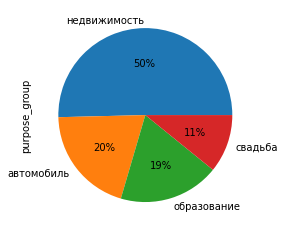

In [24]:
data['purpose_group'].value_counts().plot(kind='pie', autopct='%1.0f%%');

Категоризация целей прошла успешно.

В результате цели заемщиков распределдились следующим образом:
- половина заемщиков взяли кредит на операции с недвижимостью (покупка, ремонт)
- 20% и 19% - на покупку автомобиля и получение образования
- 11% - на свадьбу

#### Категоризация доходов

Для начала посмотрим на разброс доходов, рассчитаем минимум, максимум, среднее, медиану:

In [25]:
data['total_income'].describe()

count     21453.00
mean     165304.01
std       98163.13
min       20667.00
25%      107620.00
50%      142594.00
75%      195818.00
max     2265604.00
Name: total_income, dtype: float64

Для наглядности построим распределние:

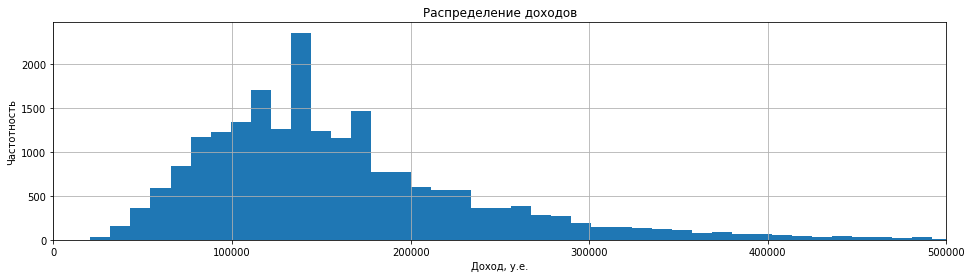

In [26]:
data['total_income'].hist(bins=200, figsize=(16,4));
plt.xlim(0,500000)
plt.title('Распределение доходов')
plt.xlabel('Доход, у.е.')
plt.ylabel('Частотность')
plt.show()

Выделим следующие категории по доходу (в скобках - краткое условное название категории):
- до 70 тыс. у.е. ("ниже среднего")
- от 70 до 180 тыс. у.е. ("средний", т.к. в этом диапазоне у нас находится и медиана, и среднее арифметическое)
- от 180 до 300 тыс. у.е.("выше среднего")
- от 300 тыс. у.е.("высокий")

Теперь напишем функцию, которая будет принимать сумму дохода и возвращать категорию дохода. Пусть нижняя граница диапазона не входит в сам диапазон, а верхняя - входит:

In [27]:
def income_group(income):
    if income <= 70000:
        return 'ниже среднего'
    if 70000 < income <= 180000:
        return 'средний'
    if 180000 < income <= 300000:
        return 'выше среднего'
    else:
        return 'высокий'
    
# проверим работоспособность функции на примерах
print(income_group(65000))
print(income_group(150000))
print(income_group(300000))
print(income_group(500000))

ниже среднего
средний
выше среднего
высокий


Функция работает корректно. Создадим столбец с категориями доходов и запишем туда возвращаемые функцией значения.

In [28]:
data['income_group'] = data['total_income'].apply(income_group)
display(data.head())
data['income_group'].value_counts()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_group,income_group
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,выше среднего
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,средний
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,средний
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,выше среднего
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,средний


средний          13557
выше среднего     4940
высокий           1482
ниже среднего     1474
Name: income_group, dtype: int64

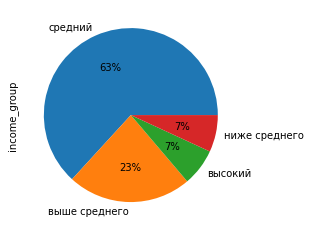

In [29]:
data['income_group'].value_counts().plot(kind='pie', autopct='%1.0f%%');

Основная масса заемщиков  - 63% - имеет средний (по нашим меркам) доход, 23% - доход выше среднего, по 7% приходится на доходы ниже среднего и высокие.


#### Категоризация количества детей

Посмотрим на список уникальных значений столбца с количеством детей

In [30]:
data['children'].value_counts()

 0     14090
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Устраним ошибки: -1 заменим на 1, 20 заменим на 2, проверим результат:

In [31]:
data['children'] = data['children'].abs().replace(20, 2)
data['children'].value_counts()

0    14090
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

Выделим 3 категории: 
- нет детей, 
- один ребенок, 
- несколько детей


Напишем функцию, которая будет возвращать категорию заемщика в зависимости от количества детей:

In [32]:
def children_group(children):
    if children == 0:
        return 'нет детей'
    if children == 1:
        return 'один ребенок'
    else:
        return 'несколько детей'
    
# проверим работоспособность функции
print(children_group(0))
print(children_group(1))
print(children_group(2))

нет детей
один ребенок
несколько детей


Функция работает корректно, применим ее к столбцу 'children', запишем возвращаемые результаты в новый столбец, проверим уникальные значения в новом столбце:

In [33]:
data['children_group'] = data['children'].apply(children_group)
display(data.head())
data['children_group'].value_counts()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_group,income_group,children_group
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,выше среднего,один ребенок
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,средний,один ребенок
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,средний,нет детей
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,выше среднего,несколько детей
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,средний,нет детей


нет детей          14090
один ребенок        4855
несколько детей     2508
Name: children_group, dtype: int64

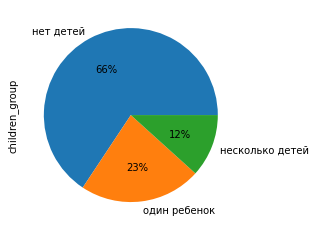

In [34]:
data['children_group'].value_counts().plot(kind='pie', autopct='%1.0f%%');

#### Вывод

Мы распределили по категориям цели, размер доходов и количество детей клиентов. 

Самая популярная цель кредитования - недвижимость (у 50% заемщиков). 

Более половины (63%) клиентов получают доход от 70 до 180 тыс. у.е.

66% заемщиков не имеют детей.

## Влияние характеристик клиентов на возврат кредита в срок

Напишем функцию, которая будет строить таблицу, в индексах которой будет нужный нам признак (категории клиентов по данному признаку), а в значениях - средняя доля должников для каждой категории:

In [35]:
def data_group(feature):
    feature_group = data.groupby(feature).agg({'debt':'mean'})\
                        .reset_index()
    feature_group = feature_group.sort_values(by='debt', ascending=False)
    return feature_group

In [36]:
data_group('children_group')

,children_group,debt
0,несколько детей,0.09
2,один ребенок,0.09
1,нет детей,0.08


### Количество детей

Есть ли зависимость между наличием детей и возвратом кредита в срок? Построим сводную таблицу с группировкой по количеству детей:

In [37]:
data_group('children_group')

,children_group,debt
0,несколько детей,0.09
2,один ребенок,0.09
1,нет детей,0.08


**Вывод**

Зависимость между наличием детей и возвратом кредита в срок есть.

Заемщики, у которых нет детей, чаще возвращают кредит в срок (доля должников 8%), чем заемщики у которых есть дети (доля должников 9%). Возможно, это объясняется тем, что с детьми расходов в целом больше и непредвиденные траты (например, на медицинские услуги, на пришедшие в негодность вещи) возникают чаще, поэтому денег на погашение в срок может просто не хватить. Также с детьми больше забот, и есть риск просто забыть о дате платежа.

### Семейное положение

Есть ли зависимость между семейным положением и возвратом кредита в срок? Построим сводную таблицу с группировкой по семейному положению:

In [38]:
data_group('family_status')

,family_status,debt
4,не женат / не замужем,0.10
2,гражданский брак,0.09
3,женат / замужем,0.08
0,в разводе,0.07
1,вдовец / вдова,0.07


**Вывод**

Зависимость между семейным положением и возвратом кредита в срок есть.

Самые надежные заемщики -  вдовцы и вдовы, а также разведенные (доля должников - 7%). Самые ненадежные - неженатые и незамужние (доля должников - 10%). Чем взрослее человек и чем больше у него жизненного опыта (в т.ч. опыта, связанного с потерями близких), тем он серьезнее относится к своим обязательствам. У неженатых и незамужних меньше обязательств, чем у семейных, меньше жизненного опыта и они более легкомысленны. 

### Уровень дохода

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [39]:
data_group('income_group')

,income_group,debt
3,средний,0.09
1,выше среднего,0.08
0,высокий,0.07
2,ниже среднего,0.07


**Вывод**

Зависимость между уровнем дохода и возвратом кредита в срок есть.

Чаще всего возвращают кредиты в срок заемщики с высокими (от 300 тыс. у.е.) и низкими (до 70 тыс.) доходами - доля должников среди них составляет всего 7%. 
Люди с высокими доходами обычно ответственно относятся ко всему, что связано с деньгами (иначе у них не было бы высоких доходов). Они планируют, адекватно рассчитывают свои силы, им легко погасить кредит в срок.
Люди с низкими доходами, чтобы выжить, считают каждый рубль, поэтому они тоже вынуждены планировать и рассчитывать свои силы.

Хуже всего возвращают кредиты заемщики со средним доходом (70-180 тыс.) - доля должников составляет 9%. Им уже не нужно бороться за выживание (в отличие от тех, у кого доход низкий), основные потребности удовлетворены, особых амбиций, скорее всего, нет (иначе они зарабатывали бы больше), поэтому на финансовую дисциплину можно "забить". Бюджет, скорее всего, не ведется, поэтому могут возникать непредвиденные кассовые разрывы и  - как следствие - просрочки выплат по кредитам.

### Цели кредита

Как разные цели кредита влияют на его возврат в срок?

In [40]:
data_group('purpose_group')

,purpose_group,debt
0,автомобиль,0.09
2,образование,0.09
3,свадьба,0.08
1,недвижимость,0.07


**Вывод**

Кредиты на операции с недвижимостью возвращаются в срок чаще всего - доля невозвратов всего 7%. Покупка недвижимости - серьезный шаг, требующий в большинстве случаев значительной суммы денег, тщательных расчетов, длительных сроков. Поэтому заемщики подходят к операциям с недвижимостью максимально ответственно. Плюс недвижимость можно сдавать в аренду и гасить за счет арендных платежей кредит.

Кредиты на свадьбу возвращаются в срок чуть реже (8% невозвратов). Это также ответственное событие, кроме того, на свадьбу могут подарить крупные денежные подарки, которые также можно пустить на погашение кредита. Однако сумма уже меньше, чем для операций с недвижимостью, меньше и ответственности.

Кредиты на образование и автомобиль возвращают реже всего, доля задолжников составляет 9%. 

Что касается образования, возможно, это связано с тем, что в процессе получения образования уменьшаются возможности полноценно зарабатывать, т.к. учеба отнимает время и силы. Кроме того, образование может начать окупаться не сразу, первое время доходы по новой специальности могут быть относительно низкими, сначала требуется получить опыт.

Автомобиль требует ремонта и техобслуживания, может попасть в аварию или быть угнан. Для большинства заемщиков - это скорее пассив, средство передвижения, но не средство заработка (таксисты и грузоперевозчики редко пользуются автокредитом, для них выгоднее лизинг). Поэтому автомобиль сам себя редко окупает. Отсюда и максимальная доля просрочек.

## Общий вывод

Семейное положение, наличие детей, величина дохода и цель кредита - важные характеристики, влияющие на вероятность возврата кредита в срок.

Портрет надежного заемщика: 
1. официально состоял либо состоит в браке
2. без детей
3. с доходом от 300 тыс.  либо до 70 тыс. у.е.
4. цель кредита - операции с недвижимостью

Примечание: недвижимость бывает разная (это может быть в т.ч. комната или деревянный дом, например), кроме того, сюда попадают кредиты на ремонт недвижимости, поэтому заемщиков с низкими доходами не исключаем. Важным параметром для оценки платежеспособности здесь будет также сумма кредита в сравнении с суммой дохода.

Портрет ненадежного заемщика:
1. официально не состоит и никогда не состоял в браке
2. есть дети
3. доход от 70 до 180 тыс.
4. цель кредита - покупка автомобиля либо образование